In [ ]:
import os
import cv2
import json
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.image as img
from tensorflow.keras.utils import plot_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle
#Taking the EDA data for
with open('/content/drive/My Drive/DeepFakeDataset/Models/inception/data30/x30.pickle', 'rb') as data:
    X = pickle.load(data)
with open('/content/drive/My Drive/DeepFakeDataset/Models/inception/data30/y30.pickle', 'rb') as data:
    Y = pickle.load(data)

In [ ]:
with open('/content/drive/My Drive/DeepFakeDataset/Models/inception/data30/Y_val_org.pickle', 'rb') as data:
    Y_val_org = pickle.load(data)

In [ ]:
#Train-Test split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state=5)

In [ ]:
input_shape=(128,128,3)

In [ ]:
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

googleNet_model = InceptionResNetV2(include_top=False, weights='imagenet', input_shape=input_shape)
googleNet_model.trainable = True
model = Sequential()
model.add(googleNet_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(units=2, activation='softmax'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=1e-5, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 2, 2, 1536)       54336736  
 onal)                                                           
                                                                 
 global_average_pooling2d_1   (None, 1536)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 2)                 3074      
                                                                 
Total params: 54,339,810
Trainable params: 54,279,266
Non-trainable params: 60,544
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


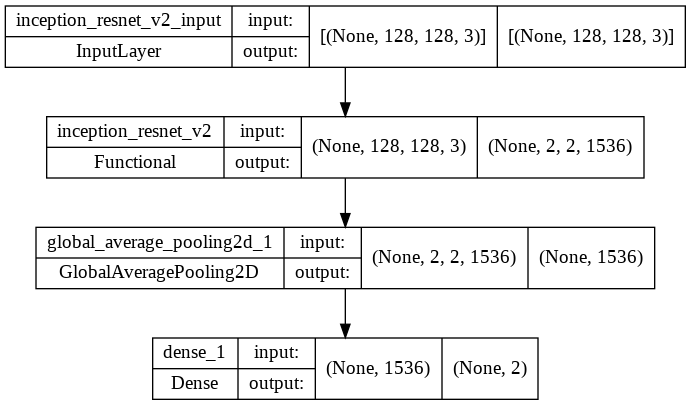

In [ ]:
plot_model(model, to_file = '/content/drive/My Drive/DeepFakeDataset/Models/inception/data30/model_30_structure_plot.png', show_shapes = True, show_layer_names = True)

In [ ]:
EPOCHS = 20
BATCH_SIZE = 100
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = EPOCHS, validation_data = (X_val, Y_val), verbose = 1)

Epoch 1/20
87/87 [==============================] - 50s 388ms/step - loss: 0.5932 - accuracy: 0.7151 - val_loss: 0.6462 - val_accuracy: 0.6486
Epoch 2/20
87/87 [==============================] - 30s 347ms/step - loss: 0.3876 - accuracy: 0.8827 - val_loss: 0.5347 - val_accuracy: 0.7742
Epoch 3/20
87/87 [==============================] - 30s 350ms/step - loss: 0.2515 - accuracy: 0.9285 - val_loss: 0.4443 - val_accuracy: 0.8600
Epoch 4/20
87/87 [==============================] - 30s 345ms/step - loss: 0.1656 - accuracy: 0.9504 - val_loss: 0.3496 - val_accuracy: 0.9050
Epoch 5/20
87/87 [==============================] - 30s 345ms/step - loss: 0.1153 - accuracy: 0.9670 - val_loss: 0.2893 - val_accuracy: 0.9244
Epoch 6/20
87/87 [==============================] - 30s 345ms/step - loss: 0.0840 - accuracy: 0.9758 - val_loss: 0.2513 - val_accuracy: 0.9332
Epoch 7/20
87/87 [==============================] - 30s 349ms/step - loss: 0.0637 - accuracy: 0.9826 - val_loss: 0.2563 - val_accuracy: 0.9397

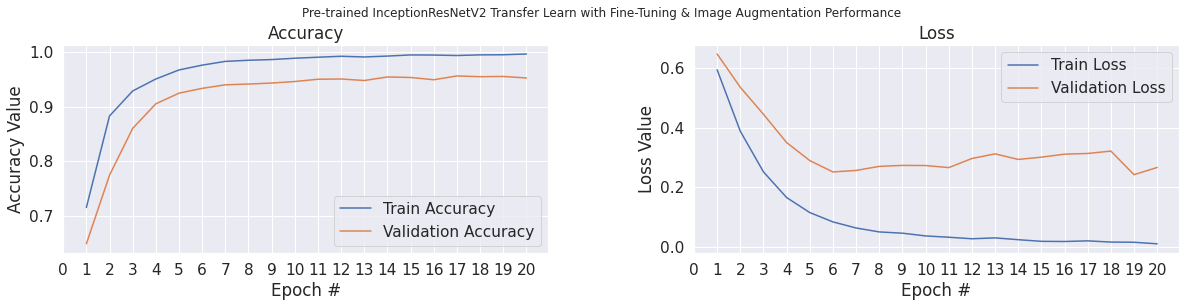

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
t = f.suptitle('Pre-trained InceptionResNetV2 Transfer Learn with Fine-Tuning & Image Augmentation Performance ', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,EPOCHS+1))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, EPOCHS+1, 1))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch #')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, EPOCHS+1, 1))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch #')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

True positive =  8427
False positive =  87
False negative =  66
True negative =  2204




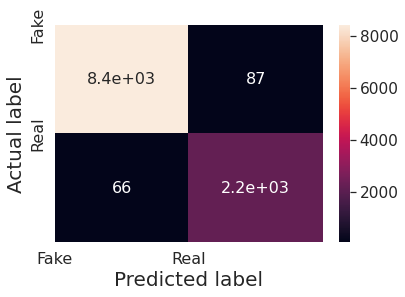

In [ ]:
#Output confusion matrix
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])
    print('\n')
    df_cm = pd.DataFrame(cm, range(2), range(2))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
    plt.ylabel('Actual label', size = 20)
    plt.xlabel('Predicted label', size = 20)
    plt.xticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.yticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.ylim([2, 0])
    plt.show()
predict_x=model.predict(X)
classes_x=np.argmax(predict_x,axis=1)
print_confusion_matrix(Y_val_org, classes_x)

In [ ]:
model.save('/content/drive/My Drive/DeepFakeDataset/Models/inception/data30/deepfake-detection-model30.h5')

In [ ]:
model.save_weights('/content/drive/My Drive/DeepFakeDataset/Models/inception/data30/deepfake-detection-model30_weights.h5')

In [ ]:
# Evaluate the trained model.
model_evaluation_history = model.evaluate(X_val, Y_val)

68/68 [==============================] - 4s 62ms/step - loss: 0.2663 - accuracy: 0.9522


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model = load_model('/content/drive/My Drive/DeepFakeDataset/Models/inception/data30/deepfake-detection-model30.h5')

In [ ]:
import dlib

In [ ]:
#Testing on single video
input_shape = (128, 128, 3)
pr_data = []
detector = dlib.get_frontal_face_detector()
cap = cv2.VideoCapture('/content/drive/My Drive/DeepFakeDataset/train_sample_videos/abarnvbtwb.mp4')
frameRate = cap.get(5)
sum=0
while cap.isOpened():
    frameId = cap.get(1)
    ret, frame = cap.read()
    if ret != True:
        break
    if frameId % ((int(frameRate)+1)*1) == 0:
        face_rects, scores, idx = detector.run(frame, 0)
        for i, d in enumerate(face_rects):
            x1 = d.left()
            y1 = d.top()
            x2 = d.right()
            y2 = d.bottom()
            crop_img = frame[y1:y2, x1:x2]
        data = img_to_array(cv2.resize(crop_img, (128, 128))).flatten() / 255.0
        data = data.reshape(-1, 128, 128, 3)
        predict_x=model.predict(data)
        classes_x=np.argmax(predict_x,axis=1)
        sum+=classes_x[0]
        print(classes_x)
if(sum>=5):
  print("Real Video")
else:
  print("Fake Video")

[1]
[0]
[0]
[1]
[1]
[1]
[0]
[1]
[1]
[0]
Real Video
